In [ ]:
'''
Ćwiczenie 1.
  Napisz skrypt w Pythonie/Matlabie umożliwiający
  wczytywanie i wizualizację badanych sygnałów.
  Program powinien umożliwiać obserwowanie wycinka
  sygnału dla zadanego przedziału czasowego,
  skalowanie osi wykresów i ich opis oraz zapis
  dowolnego wycinka sygnału do pliku o podanej nazwie.
'''

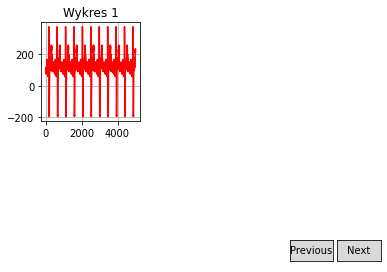

In [5]:
import pandas
import scipy
from matplotlib.widgets import Button
import matplotlib.pyplot as plt



# Function preparing .txt file with spaces to EKG .csv file
def convert_txt_to_csv(file_txt):

    header_list_ekg = "1,2,3,4,5,6,7,8,9,10,11,12"#"I,II,III,aVR,aVL,AVF,V3R,V1,V2,V4,V5,V6"

    with open(file_txt + ".txt") as file:
        content = file.read()

    content = content.replace(" ", ",")

    with open(file_txt + ".csv", "w") as file:
        file.write(header_list_ekg + "\n")
        file.write(content)


class Index(object):
    i = 0

    def next(self, event):
        self.i += 1
        print_signal("ekg.csv", self.i)
        plt.show()

    def prev(self, event):
        self.i -= 1
        print_signal("ekg.csv", self.i)
        plt.show()

callback = Index()

axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)


# Function printing EKG signal
def print_signal(file_csv, i):
    signal = pandas.read_csv(file_csv)
    i = callback.i
    pX = 0
    pY = 0

    # while i <= 11:
        
    line = []
    for _, row in signal.iterrows():
        line.append(row[i])

    y = line
    x = range(0, len(y))

    # wykres [i]
    plt.subplot2grid((2,1), (pX,pY))
    plt.plot(x,y, 'r')
    plt.grid(True)
    plt.title("Wykres " + signal.columns[i])
    # widmo wykres [i]
    plt.subplot2grid((2,3), (pX,pY))
    plt.plot(x,y, 'r')
    plt.grid(True)
    plt.title("Wykres " + signal.columns[i])

    i += 1

    if pX < 5:
        pX += 1
    else:
        pX = 0
        pY += 1

    
convert_txt_to_csv("ekg")   
print_signal("ekg.csv", 0)
plt.show()

    

